

```
# This is formatted as code
```

# Gradient Boost

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

## Importing the dataset

In [ ]:
df1 = pd.read_csv('Cleaned Train_Data.csv')
df2 = pd.read_csv('Cleaned Train_Labels.csv')
df3 = pd.read_csv('Cleaned_test_data.csv')
df4 = pd.read_csv('Cleaned_test_labels.csv')

In [ ]:
X_train = df1.iloc[:,:].values
y_train = df2.iloc[:,:].values
X_test =  df3.iloc[:,:].values
y_test =  df4.iloc[:,:].values

In [ ]:
y_train = y_train.flatten() 

In [ ]:
y_test = y_test.flatten() 

## Training the Gradient Boost on the Training set

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)


## Predicting the Test set results

In [ ]:
y_pred = clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8762  745]
 [  99   46]]


0.9125569830087028

In [ ]:
# generate a no claim prediction (majority class)
default_probs = [0 for _ in range(len(y_test))]

#Probabilities of the predictions
GB_prob = clf.predict_proba(X_test)

#We will use probabilities for the positive class only
GB_prob = GB_prob[:,1]

default_auc = roc_auc_score(y_test, default_probs)
GB_auc = roc_auc_score(y_test, GB_prob)

In [ ]:
# summarize scores
print('No Claim: ROC AUC=%.3f' % (default_auc))
print('Gradient Boost : ROC AUC=%.3f' % (GB_auc))

No Claim: ROC AUC=0.500
Gradient Boost : ROC AUC=0.770


In [ ]:
# calculate roc curves
default_fpr, default_tpr, _ = roc_curve(y_test, default_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, GB_prob)

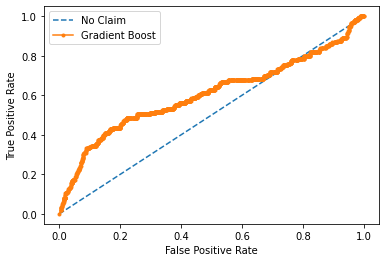

In [ ]:
# plot the roc curve for the model
plt.plot(default_fpr, default_tpr, linestyle='--', label='No Claim')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Gradient Boost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()